<a href="https://www.kaggle.com/code/ahmettalhabektas/how-we-c-n-deal-w-th-mis-ing-data?scriptVersionId=116088747" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# How we c☐n deal w☐th mis☐ing data?

**Let's overcome missing data together!**

>Q: What bothers data scientists?



>A: As you could guess, "**Irregular Data**"

![](https://cdn-images-1.medium.com/max/900/0*7NgmJ3UhDAM-Nk9M)

Photo by [Markus Winkler](https://unsplash.com/es/@markuswinkler?utm_source=medium&utm_medium=referral) on [Unsplash](https://unsplash.com/?utm_source=medium&utm_medium=referral)

## Table of contents:

**Introduction**

- **1-)For categorical data types**
  - **1.1-) Filling by Mode**
  - **1.2-) Filling by "Unknown"**
- **2-)For numerical data types**
  - **2.1-) Filling by Mean**
  - **2.2-) Filling by Median**
- **3-)For both numerical and categorical data types**
  - **3.1-)Deleting rows**
- **4-)Easy way**
   - **4.1-)SimpleImputer**
- **5)Best ways**
  - **5.1-)Filling by "Feature Engineering"**
  - **5.2-) Filling by Regression**
- **Author**

# **Introduction**


Before we start, you can find my article from [**HERE**](https://medium.com/@ahmettalhabektas/how-c-n-we-deal-w-th-mis-ing-data-f62d53e07a0c).

>## What is the missing value?


Sometimes users would not want to give their information or data. In this case, missing values in our data is existing.


The creator of the dataset can show missing values in various ways to us. The most common missing value signs are :
- None
- "Unknown"
- "unk"
- 0
- NaN


>## What is the main purpose of filling in missing data?


Our main purpose is generally trying to find a good way to make our data more similar to **Standard Normal Distribution**.

![](https://cdn-images-1.medium.com/max/900/0*25cK0hzmWmd5Pkph.jpg)

### However, sometimes, it can not or should not be similar to Standard Normal Distribution!

You will better understand when we do examples.

>## Let's learn how to fill in missing values!

# **1-)For categorical data types**


In categorical data types, we can fill by 2 methods:

1. **Filling by *Mode***: In categorical data types, we can not measure **mean** or **median**, however; we can calculate the **mode**. We will put the **mode** of the column to missing values.


2. **Filling by "Unknown"**: We can fill unknown values with "**unknown**" string 😁

# 1.1-) Filling by Mode

**"Mode"** is the most frequent value in the column. If missing data is small in contrast to all data, we can assume that these missing values are probably the most frequent value (mode).

>## Let's make an example!

I am going to use the [**NFL dataset**](https://www.kaggle.com/competitions/nfl-big-data-bowl-2020/data).


If you do not know how to read data you should read [this article](https://medium.com/@ahmettalhabektas/first-step-in-data-world-d2eef7c53e53) or [this notebook](https://www.kaggle.com/code/ahmettalhabektas/first-step-in-data-world).
>## Importing Necessary Libraries
 
 
- **Pandas** ➱ For reading data and manipulation
- **Matplotlib** ➱ For data visualization operations
- **Seaborn** ➱ For data visualization

In [1]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

>## Reading Data

In [2]:
df=pd.read_csv("/kaggle/input/nfl-big-data-bowl-2020/train.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


>## EDA


If you haven't met with **EDA** yet, I recommend you to read [this article](https://medium.com/mlearning-ai/our-new-friend-is-eda-ad8acb779432) or [this notebook](https://www.kaggle.com/code/ahmettalhabektas/our-new-friend-is-eda).

In [3]:
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

In [5]:
df.isnull().sum()

GameId                         0
PlayId                         0
Team                           0
X                              0
Y                              0
S                              0
A                              0
Dis                            0
Orientation                   23
Dir                           28
NflId                          0
DisplayName                    0
JerseyNumber                   0
Season                         0
YardLine                       0
Quarter                        0
GameClock                      0
PossessionTeam                 0
Down                           0
Distance                       0
FieldPosition               8602
HomeScoreBeforePlay            0
VisitorScoreBeforePlay         0
NflIdRusher                    0
OffenseFormation              88
OffensePersonnel               0
DefendersInTheBox             22
DefensePersonnel               0
PlayDirection                  0
TimeHandoff                    0
TimeSnap  

I chose the "**FieldPosition**" column because  its data type is object and it has 8602 empty rows.


>## Let's look at the distribution!


I want to look at the distribution of that column before filling in empty rows.


I will use data visualization tools. If you don't know how to visualize data you should examine [***How can you make up your data? (Part-1)***](https://www.kaggle.com/code/ahmettalhabektas/how-can-you-make-up-your-data-part-1) and [***(Part-2)***](https://www.kaggle.com/code/ahmettalhabektas/how-can-you-make-up-your-data-part-2). Also, [***Supermarket Analysis***](https://www.kaggle.com/code/ahmettalhabektas/supermarket-analysis) is a good practice notebook for data visulation. If you want, you can find articles about data visulation in [***my Medium***](https://medium.com/@ahmettalhabektas).

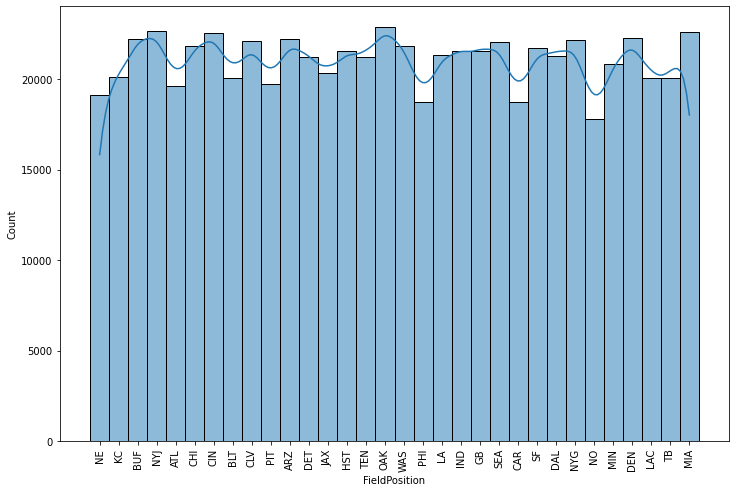

In [6]:
plt.figure(figsize=(12,8))

sns.histplot(data=df, x="FieldPosition",kde=True)

plt.xticks(rotation=90);

>## Filling missing values!


We can easily fill inside the empty rows by using the **fillna()** function.

In [7]:
df["FieldPosition"].fillna(df["FieldPosition"].mode().values[0],inplace=True)
# Here I am filling the "FieldPosition" column by its mode. 
# inplace=True means do these changes in DataFrame too.

>## Let's look at the distribution again!

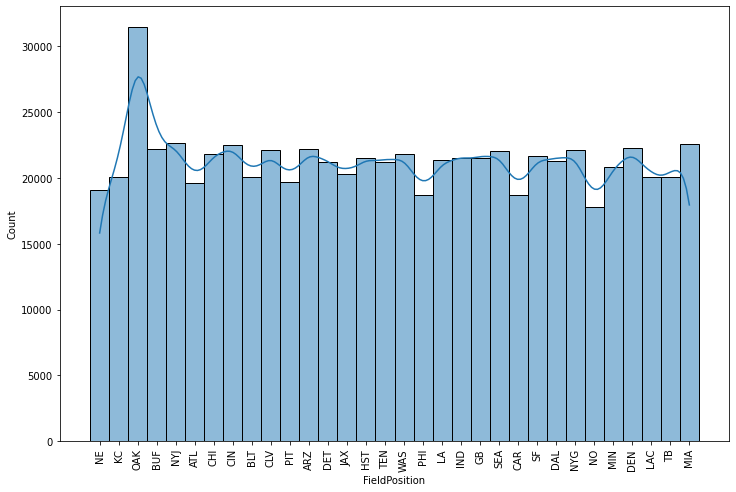

In [8]:
plt.figure(figsize=(12,8))

sns.histplot(data=df, x="FieldPosition",kde=True)

plt.xticks(rotation=90);

# **1.2-) Filling by "Unknown"**


Sometimes there could be a correlation between missing data. And if we fill that as mode we could lose that correlation. As a consequence, we fill these data with "**Unknown**" string. Of course, in this case, you can fill in whatever you want such as "**Missing**", "**Unk**" or "**your_name**" 😜

>## Let's make an example!


I am going to use [**Argentina Car Prices Dataset**](https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices).


>## Reading Data

In [9]:
df=pd.read_csv("/kaggle/input/argentina-car-prices/argentina_cars.csv")

>## EDA

In [10]:
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


In [12]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

I chose the "**color**" column because its data type is object and it has 11 empty rows.



>## Let's look at the distribution!


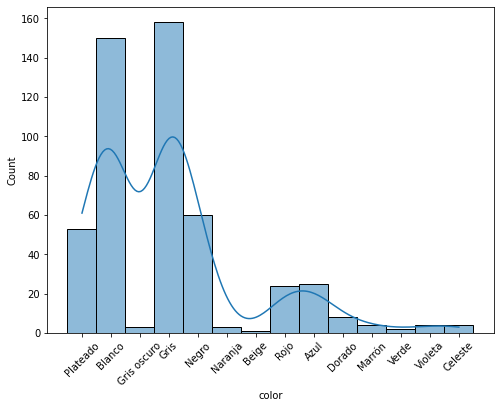

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="color",kde=True)
plt.xticks(rotation=45);

>## Filling missing values!

In [14]:
df["color"].fillna("Unknown",inplace=True)


>## Let's look at the distribution again!


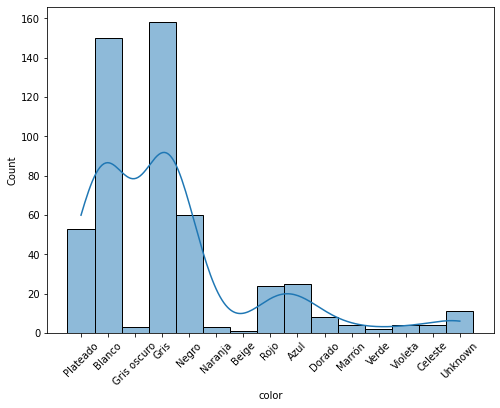

In [15]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="color",kde=True)
plt.xticks(rotation=45);

# **2-)For numerical data types**
In numerical data types, we can fill by 2 methods:
- **Filling by *Mean***
- **Filling by *Median***

# **2.1-) Filling by Mean**
"**Mean**" is the average of the column. In numerical missing values, you can not fill data by maximum or minimum value. If we do that, these values will be **Outliers**. Thus, we will fill in data by the average of the column.
>## Let's make an example!

I am going to use  [**BigMart Sales Dataset**](https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data). 
>## Reading Data

In [16]:
df=pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")

In [17]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [19]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

>## Let's look at the distribution!

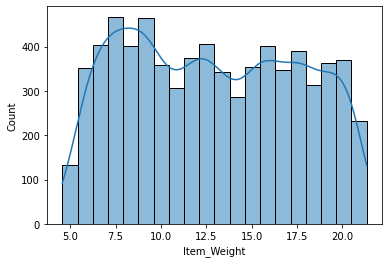

In [20]:
sns.histplot(data=df, x="Item_Weight",kde=True);

>## Filling missing values!

In [21]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

>## Let's look at the distribution again!

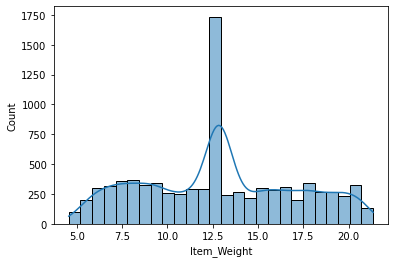

In [22]:
sns.histplot(data=df, x="Item_Weight",kde=True);

# **2.2-) Filling by Median**
"**Median**" is the middle value when we sort values from smaller to bigger. In numerical missing values, we can fill our data by using the **median** of the column. 
>## Let's make an example!

I am going to use the same dataset as before.



In this case, I will just fill by the **median** instead of the **mean**.
>## Reading Data

In [23]:
df=pd.read_csv("/kaggle/input/bigmart-sales-data/Train.csv")

I will not look at the **EDA** again because it is the same as before.
>## Let's look at the distribution!

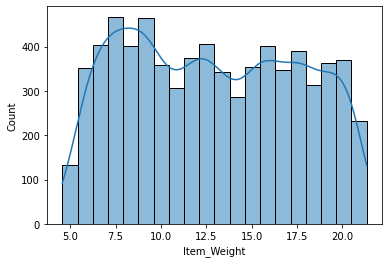

In [24]:
sns.histplot(data=df, x="Item_Weight",kde=True);

>## Filling missing values!

In [25]:
df["Item_Weight"].fillna(df["Item_Weight"].median(),inplace=True)

>## Let's look at the distribution again!

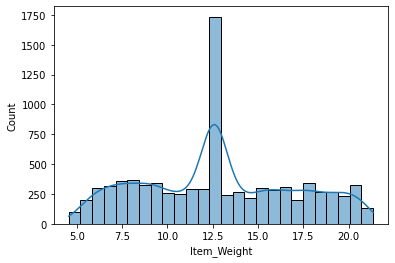

In [26]:
sns.histplot(data=df, x="Item_Weight",kde=True);

# **3-)For both numerical and categorical data types**

>## This way works with all data types!
1. ***Deleting rows*** 😅

# **3.1-)Deleting rows**


If the number of missing values is smaller than the number  of other values, you can just delete these values. As a data lover, I do not recommend you that because the data is data. we would not like to lose data.
>## Let's make an example!

I am going to use [***Argentina Car Prices Dataset***](https://www.kaggle.com/datasets/ahmettalhabektas/argentina-car-prices).
>## Reading Data

In [27]:
df=pd.read_csv("/kaggle/input/argentina-car-prices/argentina_cars.csv")

>## EDA

In [28]:
df.head()

,money,brand,model,year,color,fuel_type,door,gear,motor,body_type,kilometres,currency
0,10350000,Toyota,Corolla Cross,2022,Plateado,Nafta,5.0,Automática,NaN,SUV,500,pesos
1,10850000,Jeep,Compass,2022,Blanco,Nafta,5.0,Automática,2.4,SUV,500,pesos
2,35500,Jeep,Compass,2022,Gris oscuro,Nafta,5.0,Automática,2.4,SUV,500,dólares
3,19000,Citroën,C4 Cactus,2022,Gris oscuro,Nafta,5.0,Automática,NaN,SUV,550,dólares
4,5800000,Toyota,Corolla,2019,Gris,Nafta,4.0,Manual,1.8,Sedán,9000,pesos


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   money       510 non-null    int64  
 1   brand       510 non-null    object 
 2   model       510 non-null    object 
 3   year        510 non-null    int64  
 4   color       499 non-null    object 
 5   fuel_type   510 non-null    object 
 6   door        510 non-null    float64
 7   gear        509 non-null    object 
 8   motor       499 non-null    object 
 9   body_type   509 non-null    object 
 10  kilometres  510 non-null    int64  
 11  currency    510 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 47.9+ KB


In [30]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           1
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

In [31]:
df.shape

(510, 12)

510 rows and 12 columns.

>## Let's look at the distribution!

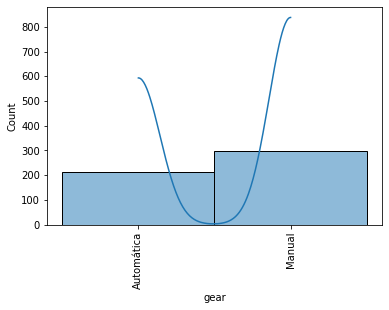

In [32]:
sns.histplot(data=df, x="gear",kde=True)
plt.xticks(rotation=90);

>## Filling missing values!

In [33]:
df.drop(df[df["gear"].isnull()].index,axis=0,inplace=True)

>## Let's look at the distribution again!

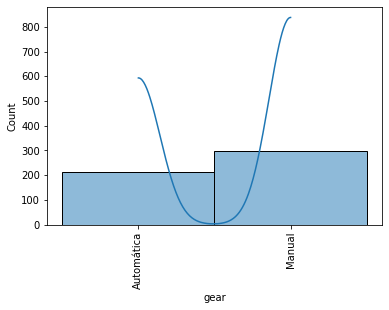

In [34]:
sns.histplot(data=df, x="gear",kde=True)
plt.xticks(rotation=90);

In [35]:
df.isnull().sum()

money          0
brand          0
model          0
year           0
color         11
fuel_type      0
door           0
gear           0
motor         11
body_type      1
kilometres     0
currency       0
dtype: int64

In [36]:
df.shape

(509, 12)

# **4-)Easy way**



We will use a new library from ***sklearn***, it will fill in data for us.
1. **SimpleImputer**

# **4.1-)SimpleImputer**
>## Let's make an example!


I am going to use the [**NFL dataset**](https://www.kaggle.com/competitions/nfl-big-data-bowl-2020/data).


>## Importing SimpleImputer

In [37]:
# Impute with scikit-learn SimpleImputer
from sklearn.impute import SimpleImputer


>## Reading Data

In [38]:
df=pd.read_csv("/kaggle/input/nfl-big-data-bowl-2020/train.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


>## EDA

In [39]:
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8.0,SW


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

In [41]:
df.isnull().sum()

GameId                         0
PlayId                         0
Team                           0
X                              0
Y                              0
S                              0
A                              0
Dis                            0
Orientation                   23
Dir                           28
NflId                          0
DisplayName                    0
JerseyNumber                   0
Season                         0
YardLine                       0
Quarter                        0
GameClock                      0
PossessionTeam                 0
Down                           0
Distance                       0
FieldPosition               8602
HomeScoreBeforePlay            0
VisitorScoreBeforePlay         0
NflIdRusher                    0
OffenseFormation              88
OffensePersonnel               0
DefendersInTheBox             22
DefensePersonnel               0
PlayDirection                  0
TimeHandoff                    0
TimeSnap  

>## Let's look at the distribution!

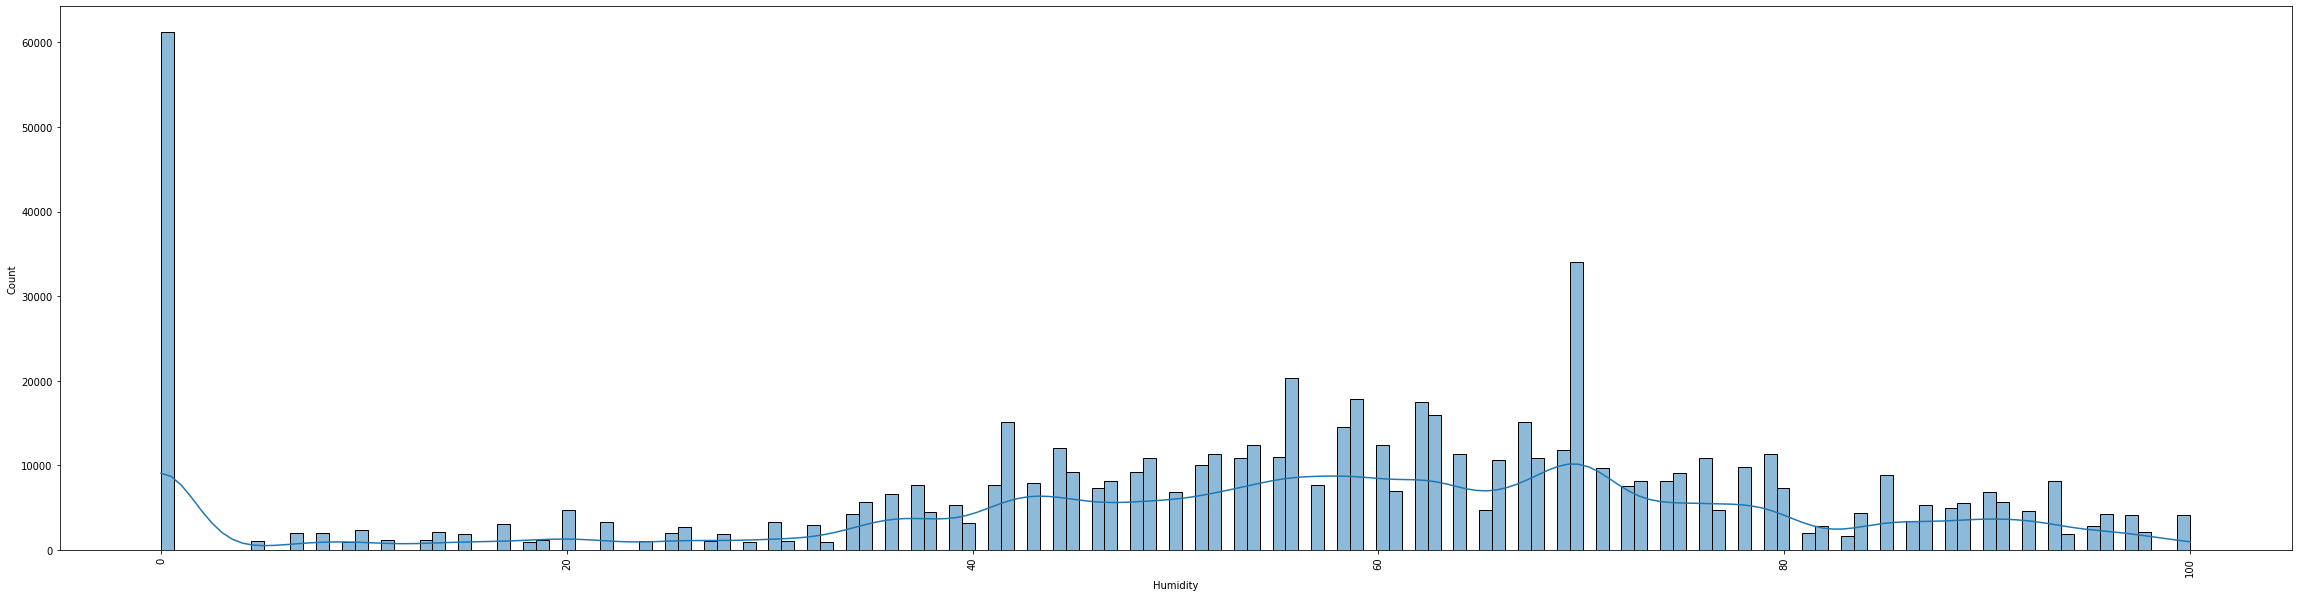

In [42]:
plt.figure(figsize=(40,10))
sns.histplot(data=df, x="Humidity",kde=True)
plt.xticks(rotation=90);

>## Filling missing values!

Firstly, we should define our strategy for filling in missing data.

In [43]:
imputer = SimpleImputer(strategy='most_frequent')

For strategy, you can also use:
1. "**mean**": just for numeric data
2. "**median**": just for numeric data
3. "**constant**": you should also define **fill_value** for replacing missing data.
4. "**most_frequent**": it can be used with categorical or numeric data.

Secondly, we should teach imputer through our data.

In [44]:
imputer.fit(df)

SimpleImputer(strategy='most_frequent')

Lastly, filling inside of empty data with our strategy.

In [45]:
imputed_df = imputer.transform(df)

The type of **imputed_df** is NumPy array so we need to convert that to DataFrame.

In [46]:
df=pd.DataFrame(imputed_df,columns=df.columns)

>## Let's look at to missing values!

In [47]:
df.isnull().sum()

GameId                    0
PlayId                    0
Team                      0
X                         0
Y                         0
S                         0
A                         0
Dis                       0
Orientation               0
Dir                       0
NflId                     0
DisplayName               0
JerseyNumber              0
Season                    0
YardLine                  0
Quarter                   0
GameClock                 0
PossessionTeam            0
Down                      0
Distance                  0
FieldPosition             0
HomeScoreBeforePlay       0
VisitorScoreBeforePlay    0
NflIdRusher               0
OffenseFormation          0
OffensePersonnel          0
DefendersInTheBox         0
DefensePersonnel          0
PlayDirection             0
TimeHandoff               0
TimeSnap                  0
Yards                     0
PlayerHeight              0
PlayerWeight              0
PlayerBirthDate           0
PlayerCollegeName   

As you see, all missing values are filled 🎉



If you want to learn more about **SimpleImputer** you can read the [**documentation of SimpleImputer**](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).
>## Let's look at the distribution again!

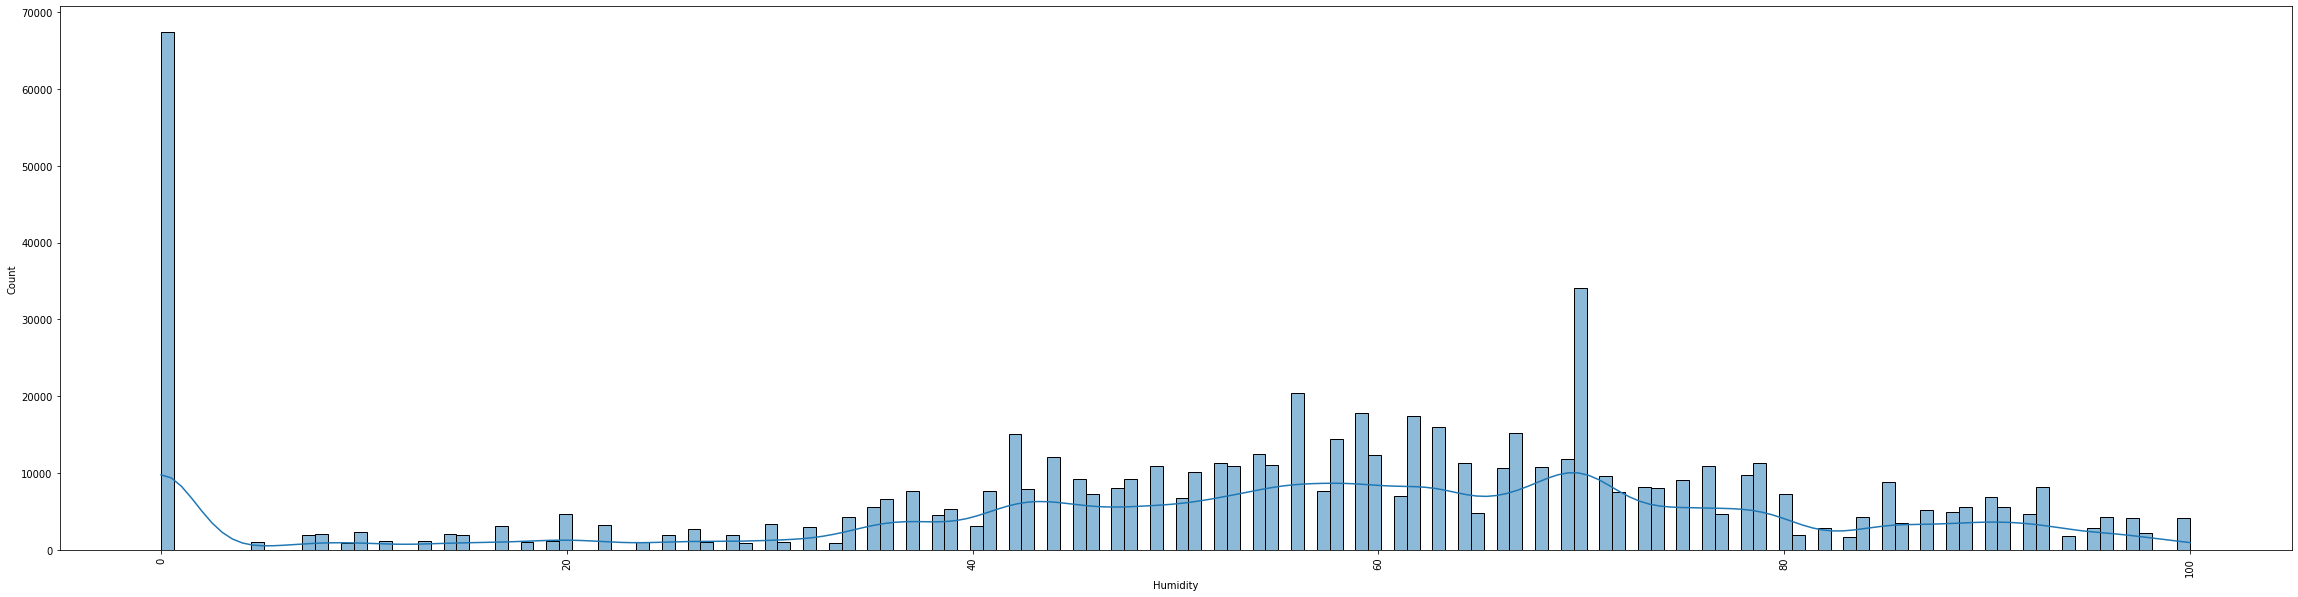

In [48]:
plt.figure(figsize=(40,10))
sns.histplot(data=df, x="Humidity",kde=True)
plt.xticks(rotation=90);

# **5)Best ways**
I will show you the best 2 ways of handling missing values. I highly recommend these ways:
1. **Filling by "*Feature Engineering*"**
2. **Filling by *Regression***

# **5.1-)Filling by "Feature Engineering"**
Feature engineering means extracting features from existing data, and extracting logical columns from existing data.
>## Let's make an example!

I am going to use [**Titanic Dataset**](https://www.kaggle.com/competitions/titanic/data).
>## Reading Data

In [49]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")

>## EDA

In [50]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

>## Extracting Feature

I will extract titles from the "Name" column.

In [53]:
df['Title']=df['Name'].str.extract(' ([A-Z,a-z]+)\.', expand=False)
# We extract words that have not only a space before itself but also a dot(".") at the end of the word.
# expand = True returns a DataFrame
# expand =False returns a Series
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

>## Let's look at the distribution!

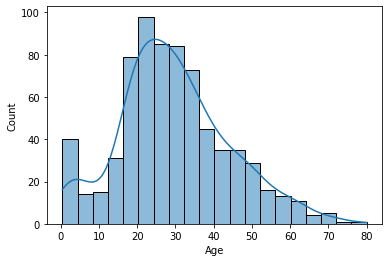

In [54]:
sns.histplot(data=df, x="Age",kde=True);

>## Filling missing values!

In [55]:
df['Age'].fillna(df.groupby("Title")["Age"].transform("mean"),inplace=True)
# Here, I am filling in missing values by mean of age in terms of "Title".
# As you know, we use "Miss" when addressing young girls and women under 30,
# use "Mrs." when addressing a married woman, 
# "Ms." when you are not sure of a woman's marital status, etc.

# So filling missing age values in terms of titles is very very logical 😁

>## Let's look at the distribution again!

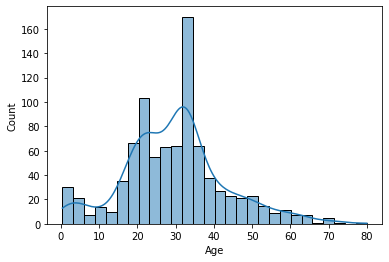

In [56]:
sns.histplot(data=df, x="Age",kde=True);

# **5.2-) Filling by Regression**

**Regression** is a field of **Artificial Intelligence** that helps to predict numerical value.


**Regression** is so fun topic but it is long. Therefore; I will show that in the next notebooks. If you want to learn **Regression**,
## **Stay tuned**! 
### My next article will be about "**REGRESSION**".

Author:
# Ahmet Talha Bektaş


If you want to ask anything to me, you can easily contact me!


📧 [***My email***](mailto:atalhabektas@gmail.com) 


🔗[***My LinkedIn***](https://www.linkedin.com/in/ahmet-talha-bekta%C5%9F-056844216/)


💻[***My GitHub***](https://github.com/ahmettalhabektas)


👨‍💻[***My Kaggle***](https://www.kaggle.com/ahmettalhabektas)



📋[***My Medium***](https://medium.com/@ahmettalhabektas)